#Projeto Data Science 1: Detecção de Fraudes com Cartão de Crédito

O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.

Este conjunto de dados apresenta transações que ocorreram em dois dias, **onde temos 492 fraudes em 284.807 transações**. O conjunto de dados é altamente desequilibrado, a **classe positiva (fraudes) é responsável por 0,172% de todas as transações**.

Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, **devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados**. Os recursos V1, V2,… V28 são os componentes principais obtidos com o PCA, os únicos recursos que não foram transformados com o PCA são 'Tempo' e 'Quantidade'. O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Amount' é o **Amount da transação**, este recurso pode ser usado como exemplo de aprendizagem dependente de custos. O recurso 'Classe' é a variável de resposta e assume o valor 1 em caso de fraude e 0 em caso contrário.

Dada a razão de desequilíbrio de classe, recomendamos medir a precisão usando a área sob a curva de recuperação de precisão (AUPRC). A precisão da matriz de confusão não é significativa para a classificação não balanceada.

Fonte:https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

## Bibliotecas e Dados

In [ ]:
#Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tratamento dos dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos python/Projeto 1: Credit Card Fraud Detection/creditcard.csv')


#Amount é o valor transacionado

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Devemos lembrar que:
*   As informações são mascaradas por um PCA por causa da confidencialidade, já que são dados reais.
*   Os dados são desbalanceados
*   A acurácia do modelo é afetada pelo desbalanceamento do banco de dados, então para se medir a eficácia do modelo deve se levar em consideração os valores de Precisão e Recall



## Pré-processamento

### Fazer o balanceamento dos dados

In [ ]:
x_df = df.iloc[:,:30].values
x_df.shape

(284807, 30)

In [ ]:
y_df = df.iloc[:,30:].values
y_df.shape

(284807, 1)

In [ ]:
from imblearn.under_sampling import TomekLinks

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
tl = TomekLinks(sampling_strategy= 'all')
X_balace, y_balance = tl.fit_resample(x_df, y_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_df = scaler_credit.fit_transform(X_balace)

In [ ]:
x_df

array([[-1.99668628, -0.69465776, -0.04413077, ...,  0.33117589,
        -0.06383124,  0.24571166],
       [-1.99668628,  0.60840292,  0.16117295, ..., -0.02209222,
         0.04456468, -0.34217571],
       [-1.99666523, -0.69391572, -0.81183141, ..., -0.1370127 ,
        -0.18107875,  1.16213256],
       ...,
       [ 1.6419094 ,  0.98002216, -0.18252522, ...,  0.01121157,
        -0.0805184 , -0.08134145],
       [ 1.6419094 , -0.12302956,  0.32128861, ...,  0.26986728,
         0.31666212, -0.31292738],
       [ 1.64199363, -0.27264208, -0.11497308, ..., -0.00581492,
         0.04130693,  0.51530841]])

In [ ]:
x_df.shape, y_df.shape

((284665, 30), (284665,))

### Fazer separação entre treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x_df, y_df, test_size = 0.30)

In [ ]:
X_teste.shape

(85400, 30)

In [ ]:
y_treino.shape

(199265,)

## Processamento: Aplicação dos algoritmos

### Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(max_iter=300)

In [ ]:
logistic.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic.intercept_

array([-9.09642655])

In [ ]:
logistic.coef_

array([[-0.08535819,  0.08330463,  0.02717595, -0.01456736,  0.95040672,
         0.24788331, -0.1344315 , -0.10172859, -0.20578346, -0.31132575,
        -0.90863328, -0.04756982,  0.13190336, -0.41829172, -0.5521647 ,
        -0.19823607, -0.26211642,  0.04895128,  0.0128676 ,  0.09978108,
        -0.32992201,  0.285287  ,  0.43466152, -0.08927941,  0.12974345,
        -0.02755911, -0.04392474, -0.31785072, -0.08129125,  0.18497057]])

In [ ]:
previsoes = logistic.predict(X_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_teste

array([0, 0, 0, ..., 0, 0, 0])

####Avaliação dos Modelos

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.9993793911007026

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.9993793911007026

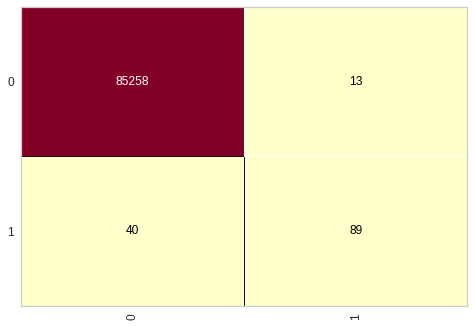

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85271
           1       0.87      0.69      0.77       129

    accuracy                           1.00     85400
   macro avg       0.94      0.84      0.89     85400
weighted avg       1.00      1.00      1.00     85400



### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = 'linear')

In [ ]:
svm.fit(X_treino, y_treino)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
previsoes = svm.predict(X_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.999519906323185

0.999519906323185

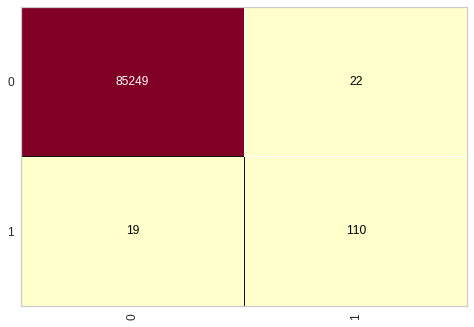

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85271
           1       0.83      0.85      0.84       129

    accuracy                           1.00     85400
   macro avg       0.92      0.93      0.92     85400
weighted avg       1.00      1.00      1.00     85400



### Redes Neurais Artificiais - RNA

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_treino.shape, y_treino.shape

((199265, 30), (199265,))

In [ ]:
(30+1)/2

15.5

In [ ]:
#30 neurônios na camada entrada
#16 neurônios na camada oculta
#16 neurônios na camada oculta
# 1 #16 neurônios na camada de saída

rede_neural = MLPClassifier(verbose=True, max_iter=1000, tol=0.000010, hidden_layer_sizes=(16, 16))
rede_neural.fit(X_treino, y_treino)

Iteration 1, loss = 0.07756484
Iteration 2, loss = 0.00407999
Iteration 3, loss = 0.00329021
Iteration 4, loss = 0.00290181
Iteration 5, loss = 0.00265447
Iteration 6, loss = 0.00244040
Iteration 7, loss = 0.00222291
Iteration 8, loss = 0.00210341
Iteration 9, loss = 0.00194128
Iteration 10, loss = 0.00187318
Iteration 11, loss = 0.00176324
Iteration 12, loss = 0.00172941
Iteration 13, loss = 0.00167789
Iteration 14, loss = 0.00168673
Iteration 15, loss = 0.00162950
Iteration 16, loss = 0.00158549
Iteration 17, loss = 0.00153535
Iteration 18, loss = 0.00152665
Iteration 19, loss = 0.00147537
Iteration 20, loss = 0.00143993
Iteration 21, loss = 0.00147129
Iteration 22, loss = 0.00131061
Iteration 23, loss = 0.00128479
Iteration 24, loss = 0.00122986
Iteration 25, loss = 0.00124538
Iteration 26, loss = 0.00118892
Iteration 27, loss = 0.00114766
Iteration 28, loss = 0.00113498
Iteration 29, loss = 0.00112572
Iteration 30, loss = 0.00112078
Iteration 31, loss = 0.00104843
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
previsoes = rede_neural.predict(X_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.9994496487119438

Iteration 1, loss = 0.08142538
Iteration 2, loss = 0.00341504
Iteration 3, loss = 0.00266302
Iteration 4, loss = 0.00238753
Iteration 5, loss = 0.00217272
Iteration 6, loss = 0.00200682
Iteration 7, loss = 0.00189387
Iteration 8, loss = 0.00179825
Iteration 9, loss = 0.00172163
Iteration 10, loss = 0.00164530
Iteration 11, loss = 0.00158412
Iteration 12, loss = 0.00152423
Iteration 13, loss = 0.00148265
Iteration 14, loss = 0.00144157
Iteration 15, loss = 0.00135127
Iteration 16, loss = 0.00134217
Iteration 17, loss = 0.00131509
Iteration 18, loss = 0.00127527
Iteration 19, loss = 0.00122351
Iteration 20, loss = 0.00116811
Iteration 21, loss = 0.00117722
Iteration 22, loss = 0.00116983
Iteration 23, loss = 0.00109197
Iteration 24, loss = 0.00115790
Iteration 25, loss = 0.00105277
Iteration 26, loss = 0.00105104
Iteration 27, loss = 0.00100205
Iteration 28, loss = 0.00104481
Iteration 29, loss = 0.00095666
Iteration 30, loss = 0.00091561
Iteration 31, loss = 0.00094982
Iteration 32, los

0.9995901639344262

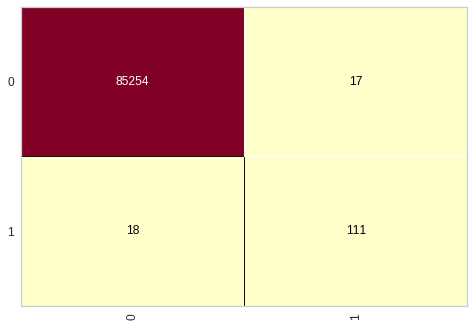

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85271
           1       0.84      0.79      0.81       129

    accuracy                           1.00     85400
   macro avg       0.92      0.90      0.91     85400
weighted avg       1.00      1.00      1.00     85400



## Resumo dos Modelos

### Resultado dos modelos

Levando em consideração que a acurácia não pode ser utilizada como uma métrica de avaliação devido ao desbalanceamento dos dados, e também que a natureza do problema tem como ponto principal a detecção das transações fraudulentas, deve se considerar o *Recall* como principal métrica de avaliação desse modelo.

### **Para os modelos temos os seguintes valores de *recall*:**


**Reg. Logística**: 
 - Não fraudulenta: 1.0
 - Fraudulenta: 0.69
 
**SVM:**
 - Não fraudulenta: 1.0
 - Fraudulenta: 0.85
 
**Redes Neurais Artificiais:**
 - Não fraudulenta: 1.0
 - Fraudulenta: 0.79
 
O maior **recall** encontrado para o projeto foi o do modelo **SVM**, com o valor de **0.85**.
O indicador **f1-score**, que leva em consideração o equlíbrio entre o recall e a precisão também apresentou o melhor resultado de todos com o valor de **0.84**

Considerando esses resultados, devemos adotar o *SVM* como o melhor algoritmo para identificar o as transações fraudulentas do projeto.

### Considerações finais

O desafio apresentado nesse projeto é bem comum nos projetos de Data Science modernos. 
Quando se trabalha com dados reais problemas como desbalanceamento dos dados, camuflagem das informações e também grande volume de informaçãose tornam corriqueiros no dia a dia.
É dever do Cientista de Dados saber quais são os mecanismos necessários para resolver o problema 